In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras import models
#from tensorflow.keras import optimizers, Sequential, Model
import warnings
warnings.filterwarnings("ignore")
import joblib

In [29]:
!pip install seaborn

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [30]:
!pip install pandas

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [31]:
!pip install scikit-learn

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [32]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [75]:
#df= pd.read_excel('waterpotability.xlsx')
df=pd.read_csv('data (12).csv')

In [57]:
!pip install openpyxl

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ph         198 non-null    float64
 1   Turbidity  198 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [77]:
df.isnull().sum()

ph           0
Turbidity    0
dtype: int64

In [78]:
df.describe()

,ph,Turbidity
count,198.000000,198.000000
mean,5.695505,5.349899
std,0.106930,1.145902
min,5.370000,3.500000
25%,5.600000,4.272500
50%,5.675000,5.385000
75%,5.770000,6.470000
max,5.910000,8.760000


In [79]:
df=df.dropna()
df.head(10)

,ph,Turbidity
0,5.37,8.76
1,5.74,6.62
2,5.63,5.16
3,5.66,4.58
4,5.63,4.20
5,5.83,3.85
6,5.63,3.76
7,5.63,4.03
8,5.80,5.00
9,5.80,5.73


<Figure size 360x360 with 0 Axes>

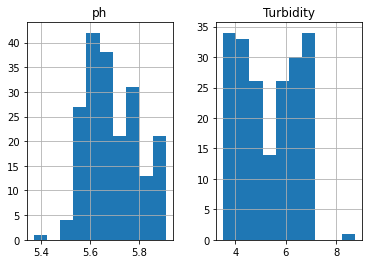

In [80]:
plt.figure(figsize=(5,5))
df.hist()
plt.show()

<AxesSubplot:>

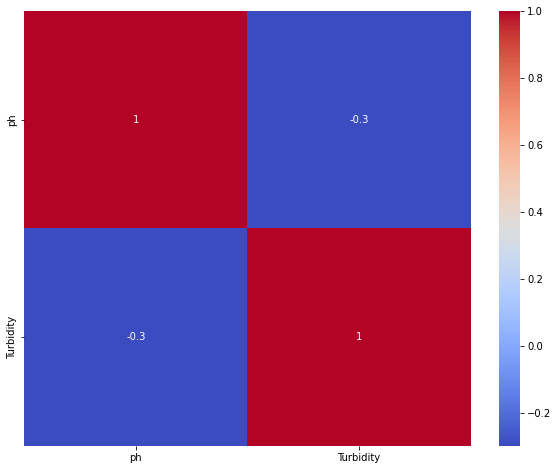

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [106]:
def Potability(q,r):
    #if df['ph']<=8.5 and df['ph']>=6.5 and df['Turbidity']<1:
    if q<=8.5 and q>=6.5 and r<1:
        p=1
    else:
        p=0
    return p
#f=lambda q, r: Potability
df['Potability'] = df[['ph','Turbidity']].apply(lambda q,r: Potability(q,r)) 

TypeError: <lambda>() missing 1 required positional argument: 'r'

In [100]:
if df['ph']<=8.5 and df['ph']>=6.5 and df['Turbidity']<1:
    #if q<=8.5 and q>=6.5 and r<1:
    df['Potability']=1
else:
    df['Potability']=0
    #return p

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [105]:
def Potability(q):
    if df['ph']<=8.5 and df['ph']>=6.5 and df['Turbidity']<1:
    #if q<=8.5 and q>=6.5 and r<1:
        p=1
    else:
        p=0
    return p
#f=lambda q, r: Potability
df['Potability'] = df['ph'].apply(lambda q: Potability(q)) 

In [86]:
'''def Potability_1(q):
    if q<=8.5 and q>=6.5:
        p=1
    else:
        p=0
    return p
df['Potability'] = df['ph'].apply(lambda q: Potability_1(q))'''

In [87]:
df.head(5)

,ph,Turbidity,Potability
0,5.37,8.76,0
1,5.74,6.62,0
2,5.63,5.16,0
3,5.66,4.58,0
4,5.63,4.20,0


In [88]:
from sklearn.preprocessing import LabelEncoder

#pH_Type = ['Neutral', 'Acidic', 'Basic']
#Turbidity_Type= ['Good for Drinking water','Medium','Above range']
#le = LabelEncoder()
#le0 = le.fit(pH_Type)
#le1 = le.fit(Turbidity_Type)
#df['pH_Type'] = le.fit_transform(df['pH_Type'].astype(str))
#df['Turbidity_Type'] = le.fit_transform(df['Turbidity_Type'].astype(str))
#df.head(5)

<AxesSubplot:>

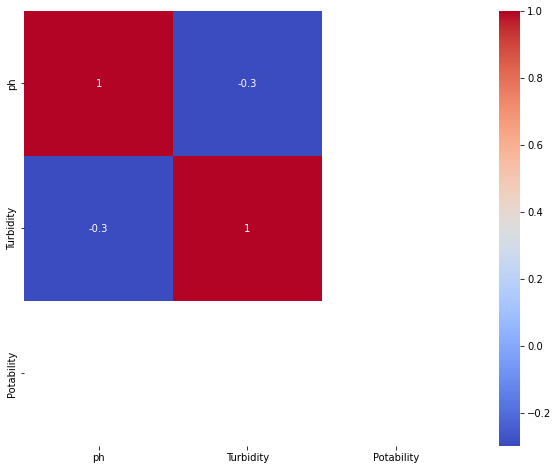

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [90]:
X = df.drop('Potability', axis=1)
y = df['Potability']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=49)
#scale=StandardScaler()
#X_train1=scale.fit_transform(X_train)
#X_test1=scale.transform(X_test)
#y_train=y_train.values
#y_test=y_test.values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Accuracy_score=[]
def predict(model):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    Accuracy_score.append(accuracy_score(y_test,preds))
    print('Accuracy is',accuracy_score(y_test,preds))
    print('Confusion matrix of the model is',confusion_matrix(y_test,preds))
    print('Classification report:',classification_report(y_test,preds))

(158, 2) (40, 2) (158,) (40,)


In [91]:
predict(RandomForestClassifier())
joblib.dump(RandomForestClassifier(),'rf.sav')

Accuracy is 1.0
Confusion matrix of the model is [[40]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



['rf.sav']